# Pregunta 1

$a)$ Sea D un set de datos linealmente separables. Como sabemos, el SVM(D) queda determinado solo por los vectores de soporte de D. De este modo, existe un conjunto A = conjunto de vectores de soporte de D, con A $ \subseteq $ D tal que: SVM(D) = SVM(A).

Por otro lado, para cualquier set de datos B $ \subseteq $ D con $ |B| < |A| $ se cumple que que no estan todos los vectores de soporte asociados a D, por lo tanto, se cumple para $B$ que: SVM(D) $ \neq $ SVM(B).



$b)$ En el caso de que $D$ sea demasiado grande como para que sean utilizados todos sus ejemplos para entrenar un SVM, si es que tenemos un oraculo que dado un ejemplo cualquierda en $D$ retorne el puntaje que hubiera asignado SVM(D), entonces estos puntajes los podemos usar de modo que sabemos que los vectores de soporte de $D$ deberían tener puntajes tales que su valor absoluto sea cercano a 1, de esta forma, podemos elegir de entre todos los puntajes a aquellos que sus valores absolutos esten más cercanos a 1, y luego usar estos vectores que deberían tener una cardinalidad mucho mayor a D para entrenar un SVM, y como sabemos el resultado sería un SVM equivalente a D, pues son solo los vectores de soporte los que determinan a un SVM.

$c)$ Primero que todo notemos que como nuestros datos son tantos entonces haremos 20 iteraciones, en donde en cada iteración revisaremos el 5% de los datos, así de esta forma recorremos el 100% de los datos.

Ahora notemos que para cada set de datos analizados, tendremos nuestra recta separadora, sin embargo, lo que nosotros buscamos es que esta recta sea lo más similar a la recta separadora real de todos los datos.

Mostaremos el siguiente grafico donde la recta azul corresponde a la recta separadora actual, la recta roja corresponde a la recta separadora real, los puntos amarillos y morados corresponden a los puntos de este ejemplo y los puntos grises corresponden a puntos reales no considerados en el actual ejemplo:

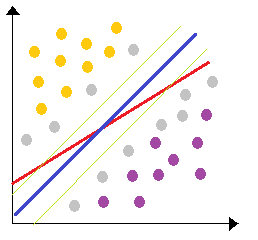

Notemos ahora que nuestra observación nos dice que entre más pequeño sea el margen que tiene nuestro SVM, más nos pareceremos a nuestra recta real, por ende, lo que haremos es que elegiremos de todos los modelos al modelo que tenga el menor margen.

Respecto a la pregunta de si este algoritmo se puede utilizar en un set de datos no linealmente separables la respuesta es que NO pues este algoritmo se deduce a partir de una estructura linealmente separable, en caso contrario podrían ocurrir demasiados fenomenos que hacen que este algoritmo pierda validez.

$d)$ Ahora implementaremos el método propuesto en c), usando funciones que se utilizaron en el ejemplo de clases.

In [1]:
import random
import numpy as np
%matplotlib inline
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.lines import Line2D
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# Esta función fue sacada 100% de los archivos que subió el profesor

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
# Este codigo también esta basado en uno que hizo el profesor

def plot_svm(X_entrenamiento, X_test, y_entrenamiento, y_test, model, ax=None, plot_support=True):
    ax = ax or plt.gca()
    
    # Se grafica la primera componente y la segunda componente de los vectores de entrenamiento
    ax.scatter(X_entrenamiento[:, 0], X_entrenamiento[:, 1], c = y_entrenamiento, s = 50, cmap = 'Greys', alpha=0.5)
    
    # Se grafica la primera componente y la segunda componente de los vectores de test en conjunto con los valores 
    # de su respectiva clasificación
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='spring', label=y_test, alpha=0.7)
    
    
    colores = [Line2D([0], [0], color='gray', marker='o', linestyle=""),
                      Line2D([0], [0], color=plt.cm.autumn(-1000), marker='o', linestyle=""),
                      Line2D([0], [0], color=plt.cm.autumn(1000), marker='o', linestyle="")]
    
    # Definir los limites del gráfico
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    
    plot_svc_decision_function(model, ax, plot_support=plot_support)

In [4]:
#Programamos el modelo propuesto en c)

def metodo_propuesto(X, y, tamano_muestra):

    mejor_modelo = None
    
    distancia_menor = np.inf
    

    for i in range(20):
        
        indices_elegidos = np.random.choice(X.shape[0], int(tamano_muestra*0.05), replace=False)
        modelo = SVC(kernel='linear', C=1E8)
        try:
            modelo.fit(X[indices_elegidos, :], y[indices_elegidos])
        except:
            continue
        
        vectores_de_soporte = modelo.support_vectors_
        
        #Sacamos el puntaje obtenido, es decir la distancia a la curva de separacion. Buscamos que este ancho sea 
        #el menor posible.
        puntaje_obtenido = np.abs(modelo.decision_function(vectores_de_soporte)/np.linalg.norm(modelo.coef_)).mean()
        if puntaje_obtenido < distancia_menor:
            mejor_modelo = modelo
            distancia_menor = puntaje_obtenido
    
    return mejor_modelo

In [5]:
random.seed(2222) #Fijar semilla para trabajar con ese resultado

Grafico del modelo completo:


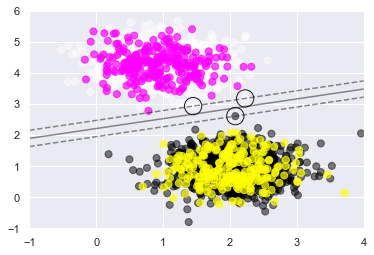

Precisión del modelo completo:  1.0
-----------------------------------------------
Grafico del modelo propuesto:


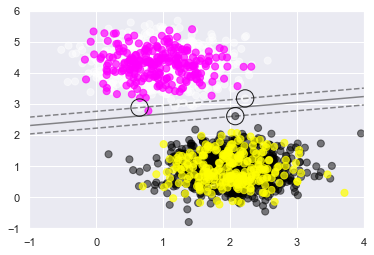

Precisión del modelo propuesto:  1.0
-----------------------------------------------


In [6]:
tamano_muestra = 2000

# Aqui pasamos a usar datos para poder 
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(*make_blobs(n_samples=tamano_muestra, centers=2,
                                              random_state=0, cluster_std=0.50))

# --------------------------

# Calculamos primero el SVM real
modelo = SVC(kernel = 'linear', C=1E8)
modelo.fit(X_entrenamiento, y_entrenamiento)
reales_vectores_soporte = modelo.support_vectors_
puntaje_f1_real = f1_score(y_test, modelo.predict(X_test))
                           
#Graficamos
print("Grafico del modelo completo:")
plot_svm(X_entrenamiento, X_test, y_entrenamiento, y_test, modelo)
plt.show()

print("Precisión del modelo completo: ", puntaje_f1_real)

print("-----------------------------------------------")

# --------------------------

# Calculamos el SVM propuesto por mi
mejor_modelo = metodo_propuesto(X_entrenamiento, y_entrenamiento, tamano_muestra)
vectores_de_soporte = mejor_modelo.support_vectors_
puntaje_f1_propuesto = f1_score(y_test, mejor_modelo.predict(X_test))

#Graficamos
print("Grafico del modelo propuesto:")
plot_svm(X_entrenamiento, X_test, y_entrenamiento, y_test, mejor_modelo)
plt.show()


print("Precisión del modelo propuesto: ", puntaje_f1_propuesto)

print("-----------------------------------------------")


$ Comentarios: $

Primero que todo, notemos que los vectores de soporte en ambos gráficos estan marcados con un círculo.

Notemos que el set de datos de entrenamiento son los de color blanco y color negro, mientras que los datos de test son los de color rosado y color amarillo. Notemos que la precisión del modelo total según la metrica f1 (es decir, precisión) es del 100% y por otro lado la precisión del modelo propuesto es del 100% también. Por otro lado, notemos que ambas rectas de separación son muy similares, por ende podemos decir que el algoritmo es optimo.

$Bonus)$ Ahora utilizaremos el algoritmo del descenso de gradiente estocastico.

Grafico:


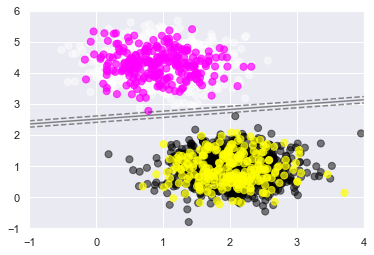

La optimalidad del modelo es: 1.0


In [7]:
# Programamos el modelo
modelo_stochastic = SGDClassifier(penalty="l2", loss="hinge", max_iter=1000)
modelo_stochastic.fit(X_entrenamiento, y_entrenamiento)
puntaje_f1_stochastic = f1_score(y_test, modelo_stochastic.predict(X_test))

#Graficamos
print("Grafico:")
plot_svm(X_entrenamiento, X_test, y_entrenamiento, y_test, modelo_stochastic, plot_support = False)
plt.show()

print("La optimalidad del modelo es:", puntaje_f1_stochastic)

$Comentarios:$ Como se observa el porcentaje de acierto aqui es muy bueno, de hecho, se tiene un 100.0% de acierto. Por otro lado, notemos que ambas rectas de separación son muy similares, por ende podemos decir que el algoritmo es optimo.